# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [20]:
minValue = 1
maxValue = 6
numberOfSamples = 6000000 # Increase number to show that it converges to a uniform distribution

In [21]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [22]:
results

0          6
1          4
2          2
3          1
4          2
          ..
5999995    2
5999996    5
5999997    3
5999998    5
5999999    5
Length: 6000000, dtype: int32

<AxesSubplot:>

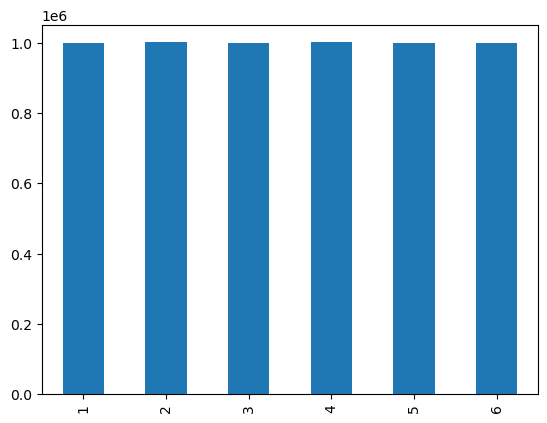

In [23]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [49]:
averageLength = 174.25
stdLength = 15
numberOfPeopleToSample = 300000 # Play with these values to show the impact on the histogram

In [50]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [51]:
randomLengths

0         178.476481
1         172.841050
2         189.133980
3         168.366892
4         207.514485
             ...    
299995    179.654713
299996    179.765449
299997    190.416145
299998    161.199799
299999    196.593812
Length: 300000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

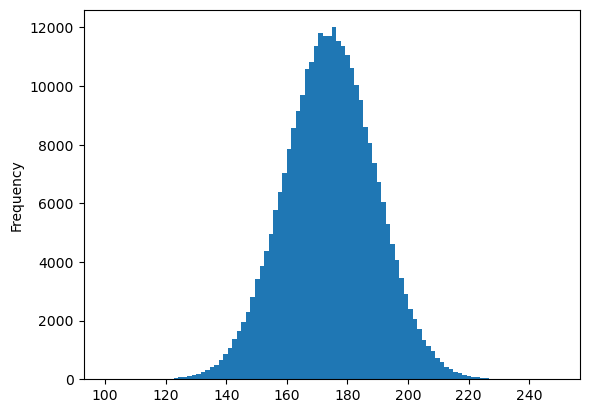

In [54]:
randomLengths.plot(kind='hist', bins=100)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [62]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 100000 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [64]:
sampleMeans

[174.02388914784385,
 177.04735108288173,
 175.79533389035717,
 174.37335805397132,
 172.69641426108615,
 174.8971998080264,
 173.1462230203811,
 175.83975360324803,
 175.76249045784283,
 173.97358489576345,
 173.67867602840295,
 172.36875757147266,
 171.90676783838123,
 175.745840506259,
 174.13059280934732,
 173.9406961562492,
 172.44083980317708,
 172.0288813125492,
 173.5007168421269,
 173.22325804936355,
 171.88934909257208,
 173.32925648023954,
 173.4815177923166,
 173.4019835016388,
 174.3591866508659,
 176.8596048464286,
 172.43606290681146,
 176.15540046612062,
 174.9005772728538,
 173.87722633177236,
 174.24033354259873,
 173.85212783079152,
 174.89155644317165,
 174.10503659448958,
 171.94501085479862,
 170.9858725029938,
 173.1673489645314,
 176.3914046937756,
 176.13758973818412,
 177.2267320808696,
 174.18365942292007,
 174.96927180072444,
 174.55755222205065,
 175.40018770745866,
 174.92000568211944,
 175.3905239753112,
 174.0007613237331,
 177.02192005059948,
 171.69063

<AxesSubplot:ylabel='Frequency'>

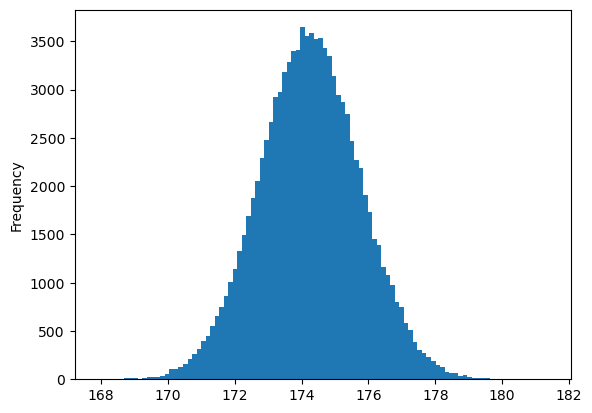

In [67]:
pd.Series(sampleMeans).plot(kind='hist', bins = 100)

In [68]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

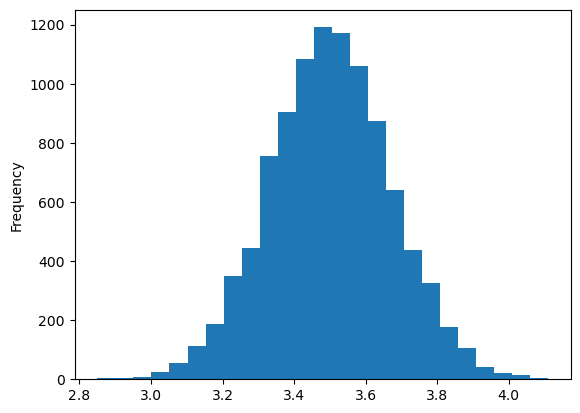

In [69]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [77]:
import scipy.stats as st
confidence = 0.99
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(171.0753878363117, 179.77241163516672)

In [78]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(2.7908020015333515, 3.4691979984666483)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)